In [19]:
import h5py
import numpy as np
import scipy.io
from scipy.misc import imsave
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction import image
import seaborn as sns
import caffe

from IPython.core.pylabtools import figsize
figsize(5, 5)

In [3]:
patch_size = (9, 9)

<h2>PaviaU.mat</h2>

In [4]:
paviaU = scipy.io.loadmat('dataset/Pavia_uni/PaviaU.mat')
npPaviaU=np.array(paviaU['paviaU'])

print ("Height:\t\t%i pixels\nWidth:\t\t%i pixels\nChannels:\t%i" % npPaviaU.shape)
print ("data-type: %s " % npPaviaU.dtype)

Height:		610 pixels
Width:		340 pixels
Channels:	103
data-type: uint16 


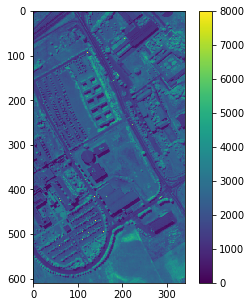

In [25]:
plt.imshow(npPaviaU[:,:,100])
#plt.show()
plt.colorbar()

<h2>paviaU_trainImage</h2>

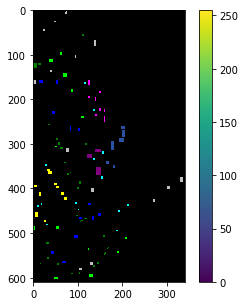

In [6]:
paviaU_trainImage = cv2.imread('images/pavia_university/Train_University.bmp')

paviaU_trainImage_crop_img = paviaU_trainImage[0:610, 0:340] # Crop from x, y, w, h -> 100, 200, 300, 400
# NOTE: its img[y: y + h, x: x + w] and *not* img[x: x + w, y: y + h]


npPaviaU_trainImage=np.array(paviaU_trainImage_crop_img)

plt.imshow(paviaU_trainImage_crop_img)

plt.colorbar()

<h2>paviaU_testImage</h2>

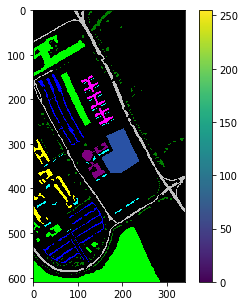

In [11]:
paviaU_testImage = cv2.imread('images/pavia_university/Test_University.bmp')

paviaU_testImage_crop_img = paviaU_testImage[0:610, 0:340]


npPaviaU_testImage=np.array(paviaU_testImage_crop_img)

plt.imshow(npPaviaU_testImage)

#plt.show()
plt.colorbar()

<b>PaviaU Padding</b>

In [12]:
npPaviaU_pad = np.pad(npPaviaU, ((4,4), (4,4), (0,0)), mode='constant')
npPaviaU_pad.shape  

(618, 348, 103)

In [13]:
npPaviaU_trainImage_pad = np.pad(npPaviaU_trainImage, ((4,4), (4,4), (0,0)), mode='constant')
npPaviaU_trainImage_pad.shape  

(618, 348, 3)

In [14]:
npPaviaU_testImage_pad = np.pad(npPaviaU_testImage, ((4,4), (4,4), (0,0)), mode='constant')
npPaviaU_testImage_pad.shape  

(618, 348, 3)

<b>Create Patches</b>

In [15]:
npPaviaU_patches = image.extract_patches_2d(npPaviaU_pad, patch_size)
npPaviaU_patches.shape

(207400, 9, 9, 103)

In [16]:
npPaviaU_trainImage_patches = image.extract_patches_2d(npPaviaU_trainImage_pad, patch_size)
npPaviaU_trainImage_patches.shape

(207400, 9, 9, 3)

In [17]:
npPaviaU_testImage_patches = image.extract_patches_2d(npPaviaU_testImage_pad, patch_size)
npPaviaU_testImage_patches.shape

(207400, 9, 9, 3)

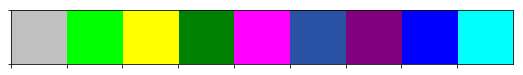

In [20]:
flatui = ["#C0C0C0", "#00ff00", "#ffff00", "#008000", "#ff00ff", "#2952a5", "#800080", "#0000ff", "#00ffff"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

0- (192, 192, 192) - #C0C0C0<br>
1- (0, 255, 0)     - #00ff00<br>
2- (255, 255, 0)   - #ffff00<br>
3- (0, 128, 0)     - #008000<br>
4- (255, 0, 255)   - #ff00ff<br>
5- (41, 82, 165)   - #2952a5<br>
6- (128, 0, 128)   - #800080<br>
7- (0, 0, 255)     - #0000ff<br>
8- (0, 255, 255)   - #00ffff<br>

In [24]:
def labeled(r,g,b):
    label = -1
    if(r==192 and g==192 and b==192):
        label = 0
    elif(r==0 and g==255 and b==0):
        label = 1   
    elif(r==255 and g==255 and b==0):
        label = 2  
    elif(r==0 and g==128 and b==0):
        label = 3  
    elif(r==255 and g==0 and b==255):
        label = 4  
    elif(r==41 and g==82 and b==165):
        label = 5  
    elif(r==128 and g==0 and b==128):
        label = 6  
    elif(r==0 and g==0 and b==255):
        label = 7        
    elif(r==0 and g==255 and b==255):
        label = 8  
        
    return label  

<h2>Create h5</h2>

<h3>TRAIN - AVG IMAGE</h3>

In [29]:
npPaviaU_patches[120000].shape

(9, 9, 103)

In [30]:
npPaviaU_patches[120000].reshape(1, 9, 9, 103).shape

(1, 9, 9, 103)

In [33]:
np.swapaxes(npPaviaU_patches[120000].reshape(1, 9, 9, 103),1,3).shape

(1, 103, 9, 9)

In [34]:
h_dim = 610
w_dim = 340
z_dim = 103

samples = 1
channels = 103
height = 9
width = 9

imageCount = 0
for i in xrange(npPaviaU_trainImage_patches.shape[0]):
    r = npPaviaU_trainImage_patches[i][4][4][0]
    g = npPaviaU_trainImage_patches[i][4][4][1]
    b = npPaviaU_trainImage_patches[i][4][4][2]
    if(r!=0 or g!=0 or b!=0):
        #(1,9,9,103)
        vec_hdf5 = np.swapaxes(npPaviaU_patches[i].reshape(samples, height, width, channels),1,3)
        
        if imageCount == 0:
            n = np.int64(vec_hdf5)
        else:
            n = n + np.int64(vec_hdf5)

                #print(n)
        imageCount +=1

avg_img_train = np.uint64(np.double(n)/imageCount)
print(avg_img_train)
print(imageCount)

[[[[1002 1001 1006 ..., 1007  994  988]
   [1016 1022 1030 ..., 1027 1014 1008]
   [1031 1039 1053 ..., 1043 1031 1021]
   ..., 
   [1062 1074 1079 ..., 1065 1057 1046]
   [1056 1068 1073 ..., 1062 1052 1041]
   [1046 1055 1062 ..., 1057 1048 1035]]

  [[ 949  946  948 ...,  946  931  922]
   [ 967  969  976 ...,  970  954  945]
   [ 983  990 1001 ...,  988  975  962]
   ..., 
   [1011 1027 1031 ..., 1014 1004  993]
   [1006 1020 1024 ..., 1010 1002  989]
   [ 992 1002 1007 ..., 1003  996  983]]

  [[ 916  912  912 ...,  909  894  884]
   [ 937  938  943 ...,  935  920  909]
   [ 954  963  972 ...,  958  941  928]
   ..., 
   [ 982  999 1005 ...,  984  974  962]
   [ 974  990  995 ...,  978  969  956]
   [ 958  970  974 ...,  970  964  950]]

  ..., 
  [[1963 1939 1920 ..., 1925 1929 1929]
   [1976 1956 1944 ..., 1972 1968 1959]
   [1981 1968 1968 ..., 2014 2001 1984]
   ..., 
   [1972 1982 2007 ..., 2027 2019 2019]
   [1975 1983 2001 ..., 2004 2008 2013]
   [1985 1990 1999 ..., 1992 2

In [37]:
np.swapaxes(npPaviaU_patches[120000].reshape(1, 9, 9, 103),1,3) + np.int64(-1*avg_img_train)

array([[[[-412, -677, -435, ..., -374, -255, -538],
         [-329, -473, -200, ..., -320, -648, -162],
         [-440, -379, -182, ..., -275, -482, -232],
         ..., 
         [ -33, -165, -199, ..., -445, -355, -436],
         [-258, -377, -237, ...,  -19, -571,  -16],
         [-413, -483, -267, ..., -264, -594, -259]],

        [[-428, -583, -646, ..., -478, -209, -518],
         [-358, -380, -317, ..., -549, -521, -285],
         [-573, -284, -263, ..., -411, -247, -227],
         ..., 
         [-181, -409, -416, ..., -297, -340, -283],
         [-308, -597, -167, ..., -264, -229, -186],
         [-373, -409, -414, ..., -173, -584, -389]],

        [[-205, -389, -474, ..., -366, -375, -440],
         [-383, -369, -275, ..., -602, -443, -201],
         [-595, -408, -369, ..., -499,  -84, -424],
         ..., 
         [-374, -606, -448, ..., -451, -457, -124],
         [-309, -739, -270, ..., -203, -363, -145],
         [-411, -403, -619, ..., -271, -418, -333]],

        ..., 

<h3>Create Train HDF5</h3>

In [42]:
#TRAIN
h_dim = 610
w_dim = 340
z_dim = 103

samples = 1
channels = 103
height = 9
width = 9

#Train Image
#paviaU_trainImage = cv2.imread('images/pavia_university/Train_University.bmp')

textfile_train = open("/home/yavuz/caffe/data/paviaUni_yama/train.txt", "w")

imageCount=0
for i in xrange(npPaviaU_trainImage_patches.shape[0]):
    r = npPaviaU_trainImage_patches[i][4][4][0]
    g = npPaviaU_trainImage_patches[i][4][4][1]
    b = npPaviaU_trainImage_patches[i][4][4][2]
    if(r!=0 or g!=0 or b!=0):
        lbl = labeled(r,g,b)
                
        h5_Train = h5py.File("/home/yavuz/caffe/data/paviaUni_yama/train/train_{x}_{label}.hdf5".format(x=i,label=lbl), 'w')
        h5_Train.create_dataset('data', (samples, channels, height, width), dtype='int64')
        h5_Train.create_dataset('label', (1,1), dtype='int8')
                
        vec_hdf5 = np.swapaxes(npPaviaU_patches[i].reshape(samples, height, width, channels),1,3)
                    
        vec_hdf5_result = np.int64(vec_hdf5 + np.int64(-1*avg_img_train))
                
        h5_Train['data'][0] = vec_hdf5_result
        h5_Train['label'][0] = lbl
                
        h5_Train.close()
                
        textfile_train.write("/home/yavuz/caffe/data/paviaUni_yama/train/train_{x}_{label}.hdf5\n".format(x=i,label=lbl))
                
        imageCount+=1
   
            
textfile_train.close()          
print("DONE! - {i}".format(i=imageCount))     

DONE! - 3921


In [43]:
i='148113'
lbl = '8'
filename = "/home/yavuz/caffe/data/paviaUni_yama/train/train_{x}_{label}.hdf5".format(x=i,label=lbl)
f = h5py.File(filename, 'r')
f["data"][0]

array([[[   73,  -142,   100, ...,  -361,  -725,   -59],
        [  -63,  -241,  -236, ...,  -487,  -453,  -235],
        [  524,  -185,  -396, ...,  -472,  -385,  -470],
        ..., 
        [ -379,  -499,  -488, ...,  -422,  -412,  -418],
        [  121,   -62,  -526, ...,  -551,  -438,  -404],
        [ -258,  -486,  -851, ...,  -722,  -338,  -593]],

       [[  329,   197,   208, ...,  -740,  -873,  -310],
        [   76,   109,   -77, ...,  -836,  -492,  -559],
        [  344,   -57,    37, ...,  -462,  -292,  -434],
        ..., 
        [ -134,  -458,  -560, ...,  -696,  -790,  -223],
        [   78,  -252,  -474, ...,  -617,  -434,  -528],
        [ -499,  -489,  -866, ...,  -514,  -374,  -514]],

       [[  198,   251,   203, ...,  -803,  -687,  -619],
        [  219,   311,    10, ...,  -762,  -669,  -752],
        [  122,    23,   261, ...,  -739,  -553,  -584],
        ..., 
        [  119,  -404,  -704, ...,  -789,  -808,  -243],
        [   62,  -392,  -576, ...,  -570, 

<h3>TEST - AVG IMAGE</h3>

In [45]:
h_dim = 610
w_dim = 340
z_dim = 103

samples = 1
channels = 103
height = 9
width = 9

imageCount = 0
for i in xrange(npPaviaU_testImage_patches.shape[0]):
    r = npPaviaU_testImage_patches[i][4][4][0]
    g = npPaviaU_testImage_patches[i][4][4][1]
    b = npPaviaU_testImage_patches[i][4][4][2]
    if(r!=0 or g!=0 or b!=0):
        vec_hdf5 = np.swapaxes(npPaviaU_patches[i].reshape(samples, height, width, channels),1,3)
        
        if imageCount == 0:
            n = np.int64(vec_hdf5)
        else:
            n = n + np.int64(vec_hdf5)

                #print(n)
        imageCount +=1

avg_img_test = np.uint64(np.double(n)/imageCount)
print(avg_img_test)
print(imageCount)

[[[[ 907  912  915 ...,  888  873  858]
   [ 917  922  928 ...,  903  886  868]
   [ 924  931  938 ...,  913  897  880]
   ..., 
   [ 937  943  943 ...,  912  902  890]
   [ 932  937  938 ...,  907  895  881]
   [ 924  929  930 ...,  902  889  872]]

  [[ 830  834  837 ...,  809  793  778]
   [ 841  847  852 ...,  825  807  789]
   [ 851  858  864 ...,  837  820  802]
   ..., 
   [ 866  873  875 ...,  841  830  816]
   [ 861  867  868 ...,  837  825  809]
   [ 853  858  859 ...,  833  819  801]]

  [[ 781  784  787 ...,  758  741  724]
   [ 793  799  804 ...,  775  756  737]
   [ 805  811  818 ...,  787  769  750]
   ..., 
   [ 821  828  831 ...,  794  782  767]
   [ 815  821  824 ...,  790  776  760]
   [ 806  812  814 ...,  785  771  752]]

  ..., 
  [[2232 2232 2236 ..., 2236 2222 2209]
   [2231 2233 2240 ..., 2240 2219 2201]
   [2235 2239 2250 ..., 2244 2218 2199]
   ..., 
   [2273 2279 2287 ..., 2201 2184 2180]
   [2282 2285 2284 ..., 2204 2192 2188]
   [2293 2292 2285 ..., 2219 2

<h3>Create Test HDF5</h3>

In [46]:
#TEST
h_dim = 610
w_dim = 340
z_dim = 103

samples = 1
channels = 103
height = 9
width = 9

textfile_test = open("/home/yavuz/caffe/data/paviaUni_yama/test.txt", "w")

imageCount=0
for i in xrange(npPaviaU_testImage_patches.shape[0]):
    r = npPaviaU_testImage_patches[i][4][4][0]
    g = npPaviaU_testImage_patches[i][4][4][1]
    b = npPaviaU_testImage_patches[i][4][4][2]
    if(r!=0 or g!=0 or b!=0):
        lbl = labeled(r,g,b)
                
        h5_Test = h5py.File("/home/yavuz/caffe/data/paviaUni_yama/test/test_{x}_{label}.hdf5".format(x=i,label=lbl), 'w')
        h5_Test.create_dataset('data', (samples, channels, height, width), dtype='int64')
        h5_Test.create_dataset('label', (1,1), dtype='int8')
                
        vec_hdf5 = np.swapaxes(npPaviaU_patches[i].reshape(samples, height, width, channels),1,3)
                    
        vec_hdf5_result = np.int64(vec_hdf5 + np.int64(-1*avg_img_test))
                
        h5_Test['data'][0] = vec_hdf5_result
        h5_Test['label'][0] = lbl
                
        h5_Test.close()
                
        textfile_test.write("/home/yavuz/caffe/data/paviaUni_yama/test/test_{x}_{label}.hdf5\n".format(x=i,label=lbl))
                
        imageCount+=1
   
            
textfile_test.close()          
print("DONE! - {i}".format(i=imageCount))     

DONE! - 42776
